In [1]:
# downloading of useful libraries
import pandas as pd
import numpy as np
import spacy
import plotly.express as px

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD

import wordcloud
import matplotlib.pyplot as plt

In [2]:
# downloading of the dataset from a csv file
dataset = pd.read_csv("sample-data.csv")

# overview of the dataset
dataset.head()

id                                        description
0   1  Active classic boxers - There's a reason why o...
1   2  Active sport boxer briefs - Skinning up Glory ...
2   3  Active sport briefs - These superbreathable no...
3   4  Alpine guide pants - Skin in, climb ice, switc...
4   5  Alpine wind jkt - On high ridges, steep ice an...

In [3]:
# let's have a look at the size of the dataset
print("The dataset has {} columns and {} rows.".format(dataset.shape[1], dataset.shape[0]))

The dataset has 2 columns and 500 rows.


We can observe that one column is an id number which isn't very helpful. Only the second one (description) is important.

#### 1- Data preparation

In [4]:
# creation of a new column with text cleaned.
# first we put all the character in lower case, and in case of we replace na by empty cell
dataset["description_clean"] = dataset["description"].fillna("").apply(lambda x : x.lower())

In [5]:
# we remove html tag
dataset["description_clean"] = dataset["description_clean"].fillna("").replace(r"<.*?>", " ", regex=True)

In [6]:
# we replace non alphanumerical character by a space
dataset["description_clean"] = dataset["description_clean"].fillna("").replace(r"[^A-Za-z0-9]+"," ", regex=True)

In [7]:
# downloading of the dictionnary in english and stop words
# en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities (definition from spacy.io)
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
nlp = en_core_web_sm.load()

In [8]:
# creation of a new column with text tokenized from text cleaned
dataset["description_tokenized"] = dataset["description_clean"].fillna("").apply(lambda x: nlp(x))

In [9]:
# lemmatization of the column with the text tokenized
# Lemmatization is a technique used to reduce inflected words to their root word (source datacamp.com)
dataset["description_tokenized"] = dataset["description_tokenized"].fillna("").apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])

In [10]:
# let's have a look at the job
dataset.head()

id                                        description  \
0   1  Active classic boxers - There's a reason why o...   
1   2  Active sport boxer briefs - Skinning up Glory ...   
2   3  Active sport briefs - These superbreathable no...   
3   4  Alpine guide pants - Skin in, climb ice, switc...   
4   5  Alpine wind jkt - On high ridges, steep ice an...   

                                   description_clean  \
0  active classic boxers there s a reason why our...   
1  active sport boxer briefs skinning up glory re...   
2  active sport briefs these superbreathable no f...   
3  alpine guide pants skin in climb ice switch to...   
4  alpine wind jkt on high ridges steep ice and a...   

                               description_tokenized  
0  [active, classic, boxer, s, reason, boxer, cul...  
1  [active, sport, boxer, brief, skin, glory, req...  
2  [active, sport, brief, superbreathable, fly, b...  
3  [alpine, guide, pant, skin, climb, ice, switch...  
4  [alpine, wind, jkt, high, ridge, steep, ice, a...

In [11]:
# join all the words in the same column from text tokenized, with space between words, in order to have again a sentence
dataset["description_tokenized"] = dataset["description_tokenized"].apply(lambda x : " ".join(x))

In [12]:
# let's have a look at the job
dataset.head()

id                                        description  \
0   1  Active classic boxers - There's a reason why o...   
1   2  Active sport boxer briefs - Skinning up Glory ...   
2   3  Active sport briefs - These superbreathable no...   
3   4  Alpine guide pants - Skin in, climb ice, switc...   
4   5  Alpine wind jkt - On high ridges, steep ice an...   

                                   description_clean  \
0  active classic boxers there s a reason why our...   
1  active sport boxer briefs skinning up glory re...   
2  active sport briefs these superbreathable no f...   
3  alpine guide pants skin in climb ice switch to...   
4  alpine wind jkt on high ridges steep ice and a...   

                               description_tokenized  
0  active classic boxer s reason boxer cult favor...  
1  active sport boxer brief skin glory require mo...  
2  active sport brief superbreathable fly brief m...  
3  alpine guide pant skin climb ice switch rock t...  
4  alpine wind jkt high ridge steep ice alpine ja...

#### 2 - Data preprocessing

In [13]:
# instanciate TfidVecorizer with stop words in english
vectorizer = TfidfVectorizer(stop_words="english")

In [14]:
# Use of TFid on the column tokenized and affect values to X
X=vectorizer.fit_transform(dataset["description_tokenized"])

In [16]:
X

<500x3833 sparse matrix of type '<class 'numpy.float64'>'
	with 34813 stored elements in Compressed Sparse Row format>

In [15]:
# transform sparse matrix X in aan array, and affect it to dense
dense = X.toarray()

# visualize the array
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
# dictionary with the list of the vocabulary and its index
vectorizer.vocabulary_

{'active': 319,
 'classic': 801,
 'boxer': 628,
 'reason': 2676,
 'cult': 1014,
 'favorite': 1387,
 'cool': 939,
 'especially': 1315,
 'sticky': 3192,
 'situation': 3017,
 'quick': 2633,
 'dry': 1198,
 'lightweight': 2007,
 'underwear': 3574,
 'minimal': 2179,
 'space': 3116,
 'travel': 3491,
 'pack': 2388,
 'expose': 1348,
 'brush': 658,
 'waistband': 3689,
 'offer': 2327,
 'skin': 3028,
 'softness': 3097,
 'panel': 2407,
 'construction': 916,
 'traditional': 3475,
 'fit': 1433,
 'functional': 1536,
 'fly': 1476,
 'oz': 2385,
 '100': 3,
 'recycle': 2685,
 'polyester': 2530,
 'moisture': 2204,
 'wicke': 3764,
 'performance': 2460,
 'inseam': 1839,
 'size': 3018,
 'recyclable': 2684,
 'common': 872,
 'thread': 3411,
 'program': 2586,
 'silky': 2996,
 'capilene': 712,
 'fabric': 1365,
 'ultralight': 3554,
 'breathable': 636,
 'elastic': 1247,
 'comfort': 863,
 'gladiodor': 1579,
 'natural': 2254,
 'odor': 2326,
 'control': 929,
 'garment': 1551,
 'weight': 3741,
 '99': 294,
 'mexico': 21

In [18]:
# matrix of vocabulary
# in column's name we have the vocabulary, and each column represents the vocabulary expresses in a number of variables (rows). 
matrix = pd.DataFrame(dense, columns=[x for x in vectorizer.get_feature_names_out()])
matrix.head()

000   03        10       100  1000  1021  1027  103  1038  1055  ...  yvon  \
0  0.0  0.0  0.000000  0.075858   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   
1  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   
2  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   
3  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   
4  0.0  0.0  0.049334  0.048673   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   

   zest  zinger  zip  zipped    zipper  zippered  zipping  zips  zone  
0   0.0     0.0  0.0     0.0  0.000000  0.000000      0.0   0.0   0.0  
1   0.0     0.0  0.0     0.0  0.000000  0.000000      0.0   0.0   0.0  
2   0.0     0.0  0.0     0.0  0.000000  0.000000      0.0   0.0   0.0  
3   0.0     0.0  0.0     0.0  0.049926  0.264379      0.0   0.0   0.0  
4   0.0     0.0  0.0     0.0  0.149844  0.000000      0.0   0.0   0.0  

[5 rows x 3833 columns]

In [19]:
# size of this matrix
matrix.shape

# the matrix has 3 833 different words, expressed in a 500 dimensions

(500, 3833)

3- DBSCAN

In [20]:
# instanciate DBSCAN with values for the main parameters, and train from the matrix
# eps = The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples = The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
# metric = The metric to use when calculating distance between instances in a feature array.
db=DBSCAN(eps=0.6, min_samples=7, metric="cosine")
db.fit(matrix)

DBSCAN(eps=0.6, metric='cosine', min_samples=7)

In [21]:
# display an array with unique values of labels from our model
# in this case, we have the number of clusters given by our model
# -1 are noisy samples
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [22]:
# transfrom array in pandas series
value = pd.Series(np.unique(db.labels_))
value

0     -1
1      0
2      1
3      2
4      3
5      4
6      5
7      6
8      7
9      8
10     9
11    10
12    11
13    12
14    13
15    14
dtype: int64

In [23]:
# shows for each words the cluster number in which it is affected
db.labels_

array([-1, -1, -1, -1,  9,  6,  0,  1, -1, -1, -1, -1, -1, -1, 14, 14, -1,
        2, -1,  2,  2,  2,  2,  2,  2,  3, -1, -1, -1, -1,  0,  4, -1,  4,
       -1,  3,  4, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1,
       -1, -1, -1, -1,  3, -1,  3, -1,  2,  2, -1,  3,  3,  3, -1,  6,  3,
        5, -1,  3,  3,  3, -1, -1, -1, -1, -1,  7,  7,  7, 13, -1, -1,  6,
        6,  8,  8,  8,  8, -1, -1, -1, -1,  3,  9,  9,  3, -1, -1, -1,  3,
       -1,  0, 13, 13,  6, 10, 10, 10, -1, -1, -1, -1, -1,  3, -1, 10, 10,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  3,  3, -1,  6, -1, -1,  3, -1, -1,  9,  7, -1, 11, -1,  3, 11,
       11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,  3,  3,
        2,  2,  2,  2,  2,  2,  3,  3, -1, -1, -1, -1, -1, -1,  3, 10, -1,
       12, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1,  8,  8,  8,  8, -1,
       -1, -1,  9,  9,  9,  9, -1,  6, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, 12, 12, -1, -1

In [24]:
# create a column "cluster" in the original dataframe  with the value of the cluster for erach sentences
dataset["cluster"] = db.labels_

# overview of the dataframe
dataset.head()

id                                        description  \
0   1  Active classic boxers - There's a reason why o...   
1   2  Active sport boxer briefs - Skinning up Glory ...   
2   3  Active sport briefs - These superbreathable no...   
3   4  Alpine guide pants - Skin in, climb ice, switc...   
4   5  Alpine wind jkt - On high ridges, steep ice an...   

                                   description_clean  \
0  active classic boxers there s a reason why our...   
1  active sport boxer briefs skinning up glory re...   
2  active sport briefs these superbreathable no f...   
3  alpine guide pants skin in climb ice switch to...   
4  alpine wind jkt on high ridges steep ice and a...   

                               description_tokenized  cluster  
0  active classic boxer s reason boxer cult favor...       -1  
1  active sport boxer brief skin glory require mo...       -1  
2  active sport brief superbreathable fly brief m...       -1  
3  alpine guide pant skin climb ice switch rock t...       -1  
4  alpine wind jkt high ridge steep ice alpine ja...        9

In [25]:
# size of each clusters found
for i in value :
    mask = (dataset["cluster"] == i)
    sample1 = dataset.loc[mask,"description"]
    print("cluster {}, number of items : {}".format(i, sample1.shape[0]))

cluster -1, number of items : 283
cluster 0, number of items : 11
cluster 1, number of items : 9
cluster 2, number of items : 30
cluster 3, number of items : 54
cluster 4, number of items : 11
cluster 5, number of items : 8
cluster 6, number of items : 22
cluster 7, number of items : 8
cluster 8, number of items : 15
cluster 9, number of items : 12
cluster 10, number of items : 10
cluster 11, number of items : 7
cluster 12, number of items : 7
cluster 13, number of items : 7
cluster 14, number of items : 6


In [26]:
# 3 samples of rows for each cluster
# includes a try/except in orer to avoid arror if there is no sentence
for i in range (-1,15,1) :
    mask = (dataset["cluster"] == i)
    try :
        sample = dataset.loc[mask,"description"]
        print("Samples for cluster {}".format(i))
        print(sample.sample(3))
        print()
    except :
        print("No sample found for class {}".format(i))
    

Samples for cluster -1
311    Baggies shorts - A loyal partner in grime, Bag...
112    Riverwalker - felt - High water. Slick bedrock...
165    Better sweater jkt - The Better Sweater Jacket...
Name: description, dtype: object

Samples for cluster 0
402    Hip pack - Entrusted with holding our essentia...
429    Mlc - The secret to slipping through O'Hare's ...
463    Daily grind - This fully padded shoulder bag k...
Name: description, dtype: object

Samples for cluster 1
218    Solid adour btm - Adours feature a scooped, lo...
253    Solid paries btm - The boy-short-style Paries ...
261    Print sunamee btm - Stay-put Sunamees fit stra...
Name: description, dtype: object

Samples for cluster 2
358    Cap 2 cap sleeve - The fastest-drying of our p...
21     Cap 2 t-shirt - This one revels in the sweat j...
19     Cap 1 graphic t-shirt - This tee is made from ...
Name: description, dtype: object

Samples for cluster 3
238    Yosemite essence t-shirt - Artist Phyllis Shaf...
115    Rockp

In [27]:
# instantiate wordcloud which allows us to visualize words and their importance
wd = wordcloud.WordCloud()

CLUSTER  -1


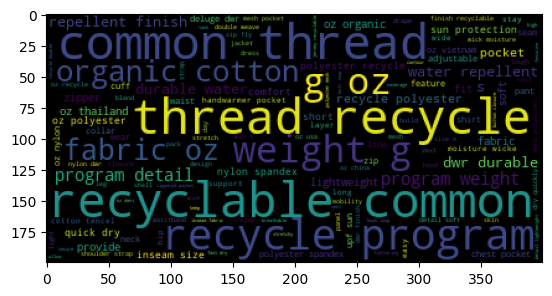

-----------
CLUSTER  3


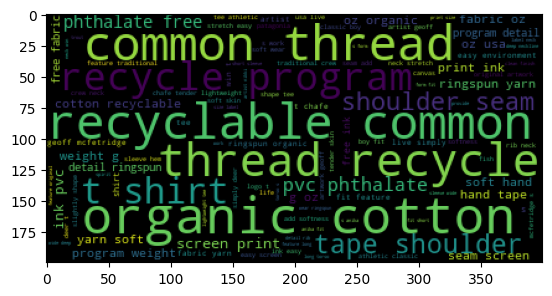

-----------
CLUSTER  2


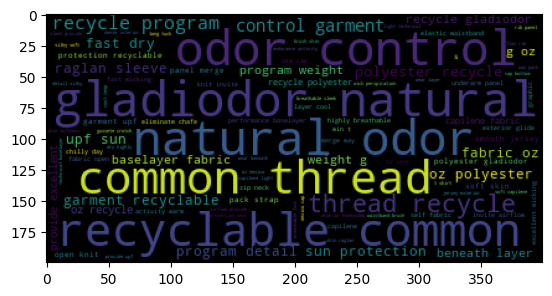

-----------
CLUSTER  6


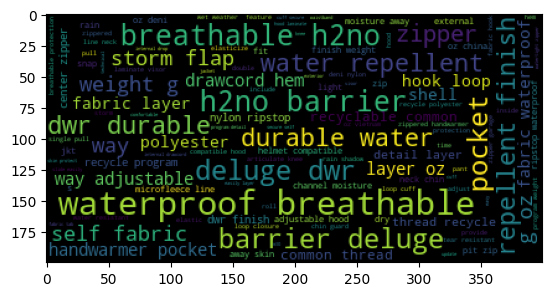

-----------
CLUSTER  8


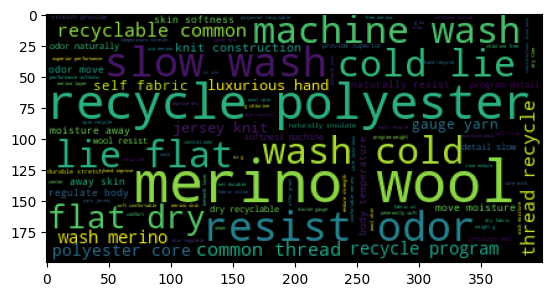

-----------
CLUSTER  9


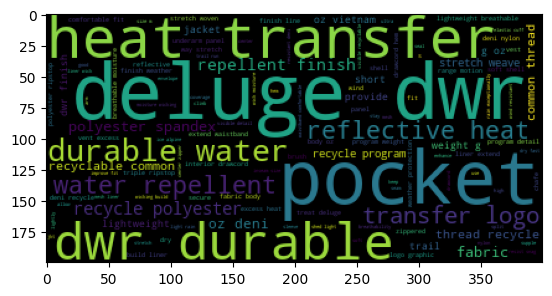

-----------
CLUSTER  0


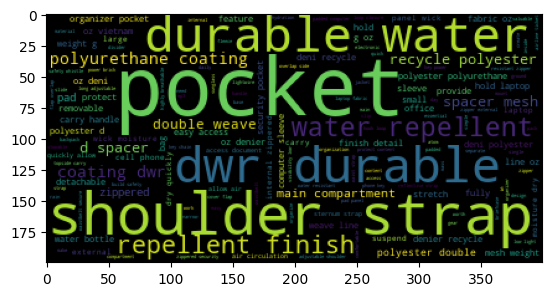

-----------
CLUSTER  4


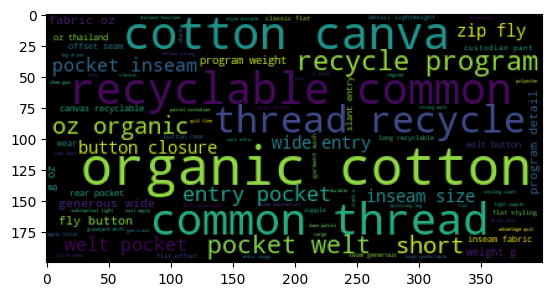

-----------
CLUSTER  10


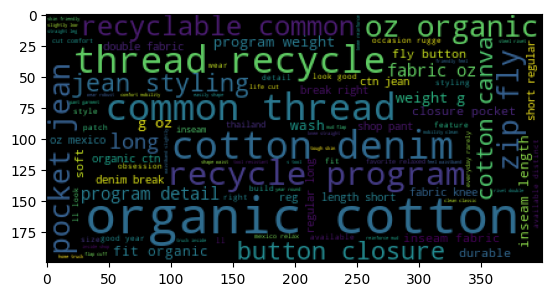

-----------
CLUSTER  1


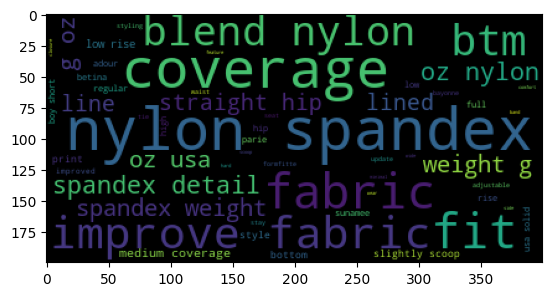

-----------
CLUSTER  5


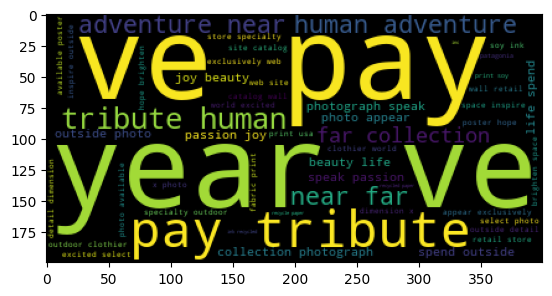

-----------
CLUSTER  7


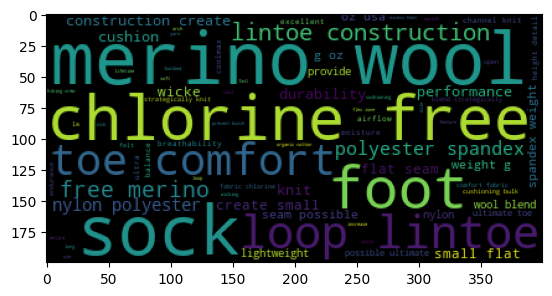

-----------
CLUSTER  13


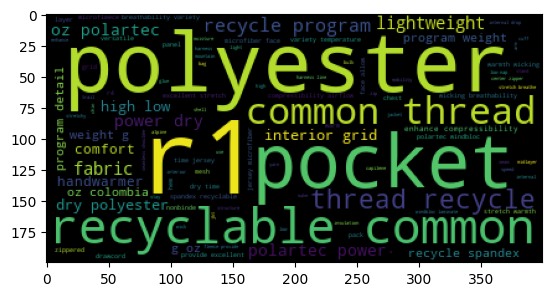

-----------
CLUSTER  11


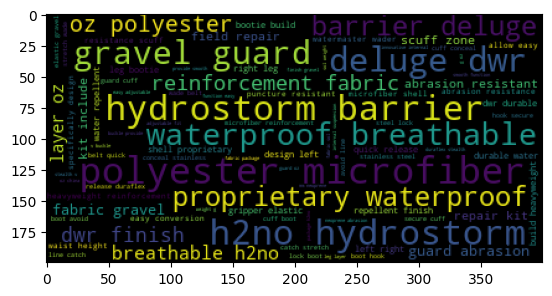

-----------
CLUSTER  12


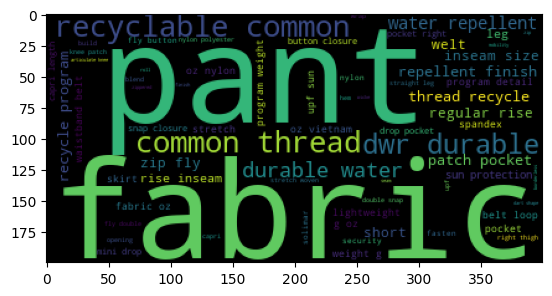

-----------
CLUSTER  14


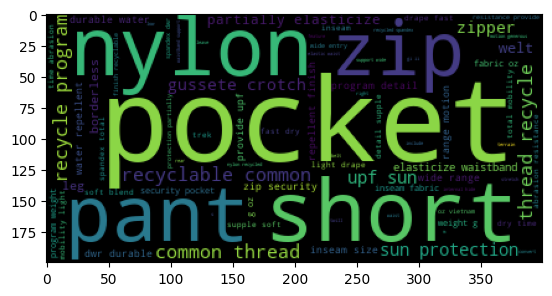

-----------


In [28]:
# visualization of main words (word cloud) for each clusters
for c in dataset["cluster"].value_counts().index :
    print("CLUSTER ", c)
    texts = " ".join(dataset.loc[dataset["cluster"]==c,"description_tokenized"])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    print("-----------")

In [46]:
def find_similar_items(id_item=1, number=5) :
    """_summary_
    function allows to find a number of similar items from a given article (id number) choosen by the user
    Args:
        id_item (integer): number given by the user between 1 and 500 (1 by default)
        number (integer)= number of sentences to find (5 by default)
    """
    if int(id_item) > 500 or int(id_item) < 1 :
        print("ref number is out of range, please set a number between 1 and 500")
    else :
        cluster_id = dataset.loc[dataset["id"]==int(id_item),"cluster"].values[0] # .values pour enlever les index et ne garder que la valeur
        mask = (dataset["cluster"] == cluster_id)
        liste = dataset.loc[mask,"description"].sample(number) 
        if len(liste) == 0 :
            print("pas d'autre article trouvé :")
        else :
            print(liste)

choice = input("choose an id between 1 and 500:")
find_similar_items(id_item=choice)

150    World according to bikers t-shir - Our health ...
330    Traverse pants - Stride lightly from the Juan ...
400    Reversible phone home - Travel broadly and sur...
323    Vitalti pants - Soft and stretchy Vitaliti pan...
188    Island hemp pants - A solid choice for evening...
Name: description, dtype: object


4 - SVD Model

In [47]:
# Instantiate model with values for main parameters, and fit
# n_components = Desired dimensionality of output data
# n_iter = Number of iterations for randomized SVD solver
svd_model = TruncatedSVD(n_components=10, n_iter=100, random_state=0)
lsa = svd_model.fit_transform(matrix)

In [48]:
# creation of a dataframe with coef for each topic, and a column with the tokenized text (documents)
topic_encoded_df = pd.DataFrame(lsa, columns=["topic_{}".format(i+1) for i in range(10)], index = dataset.index)
topic_encoded_df["documents"]=dataset["description_tokenized"]

# overview of the dataframe created
topic_encoded_df

topic_1   topic_2   topic_3   topic_4   topic_5   topic_6   topic_7  \
0    0.278233 -0.045958  0.184359  0.083938 -0.122873 -0.014662 -0.055467   
1    0.277866 -0.060689  0.097423  0.096460 -0.011016  0.106851 -0.061501   
2    0.265909 -0.082200  0.110598  0.027234 -0.017384  0.115961  0.012061   
3    0.382988 -0.252585 -0.115812 -0.139265  0.049480 -0.010041 -0.018968   
4    0.395487 -0.268967 -0.025769 -0.234405 -0.037164 -0.024746  0.050016   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.334433 -0.078282  0.391558  0.070603 -0.261080 -0.039831 -0.037203   
496  0.371022 -0.075686  0.489173 -0.010508 -0.302613 -0.044846  0.002745   
497  0.344310 -0.222932 -0.069260 -0.247970 -0.013447 -0.150549  0.138611   
498  0.330005  0.052317 -0.130341  0.315485  0.025854 -0.139097 -0.117941   
499  0.393826  0.050356 -0.187955  0.348455  0.017231 -0.154037 -0.108315   

      topic_8   topic_9  topic_10  \
0   -0.019216 -0.149581  0.001630   
1   -0.023856 -0.109068 -0.072621   
2    0.057730 -0.058763 -0.012502   
3   -0.053827 -0.052572 -0.152228   
4    0.044135  0.041475 -0.195193   
..        ...       ...       ...   
495 -0.097534 -0.341436  0.033678   
496 -0.003769 -0.241649  0.108678   
497 -0.169114  0.052856  0.039383   
498 -0.004451 -0.085074  0.024806   
499 -0.001082 -0.072342  0.019956   

                                             documents  
0    active classic boxer s reason boxer cult favor...  
1    active sport boxer brief skin glory require mo...  
2    active sport brief superbreathable fly brief m...  
3    alpine guide pant skin climb ice switch rock t...  
4    alpine wind jkt high ridge steep ice alpine ja...  
..                                                 ...  
495  cap 2 bottom cut loose madden crowd search und...  
496  cap 2 crew crew take edge fickle weather clear...  
497  time shell need use morning time umbrella time...  
498  wear cargo short wear cargo short bask glory s...  
499  wear short time simplify wear short prove shor...  

[500 rows x 11 columns]

In [49]:
# creation of a column "class_pred" with the main topic
topic_encoded_df["class_pred"] = [np.argmax(topic) for topic in lsa]

# Distribution of the different topics
topic_encoded_df["class_pred"].value_counts()

class_pred
0    277
1     61
2     35
7     27
5     24
9     20
8     19
3     15
4     12
6     10
Name: count, dtype: int64

The first class (value zero) is very important.

In [50]:
# overview of the new dataframe with topics coefficient and class prediction
topic_encoded_df.sample(10)

topic_1   topic_2   topic_3   topic_4   topic_5   topic_6   topic_7  \
13   0.210936 -0.055307  0.076283 -0.034722 -0.029416 -0.148357  0.129067   
105  0.292503 -0.108108  0.113409 -0.034880 -0.090932 -0.034217  0.073360   
410  0.240477 -0.048201  0.114326  0.044748 -0.120145  0.124138 -0.076639   
497  0.344310 -0.222932 -0.069260 -0.247970 -0.013447 -0.150549  0.138611   
50   0.301989 -0.224856 -0.122391 -0.214363  0.014124 -0.095679  0.075798   
123  0.385429  0.562371 -0.051045 -0.201316  0.010929  0.049422 -0.086664   
378  0.324020 -0.186698 -0.135667 -0.058179  0.068778 -0.017476 -0.053360   
18   0.309732 -0.068567  0.294684  0.116056 -0.237177 -0.032235 -0.057433   
329  0.387119 -0.190178 -0.195475  0.246183  0.030576  0.119928 -0.182134   
56   0.281111 -0.148260  0.059642 -0.013358 -0.086161 -0.009546  0.086584   

      topic_8   topic_9  topic_10  \
13   0.082283  0.051297 -0.197184   
105  0.091437 -0.093650 -0.178252   
410 -0.045365  0.273249  0.076830   
497 -0.169114  0.052856  0.039383   
50  -0.102351  0.020900  0.103677   
123 -0.029803 -0.035467 -0.032070   
378 -0.118981 -0.051806 -0.120214   
18  -0.074779 -0.303335  0.010838   
329 -0.110884 -0.084014 -0.132865   
56   0.009363 -0.094283 -0.147984   

                                             documents  class_pred  
13   well sweater jkt june night camp new mexico s ...           0  
105  r1 p o desert sandstone corn snow ice corner s...           0  
410  sun mask sun protection work use comfort mean ...           8  
497  time shell need use morning time umbrella time...           0  
50   guidewater jkt pound tooth easter swinge tip d...           0  
123  squid t shirt artist tim tompkinson s original...           1  
378  lw guide pant backcountry version immensely po...           0  
18   cap 1 boxer brief bivy belay form fitting capi...           0  
329  borderless zip pant wear capris border pant ve...           0  
56   insulator pant steelhead salmon trout aren t c...           0

CLUSTER  0


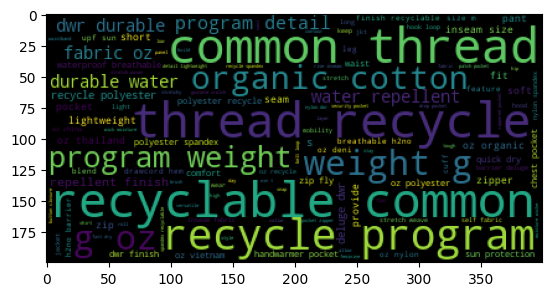

-----------
CLUSTER  1


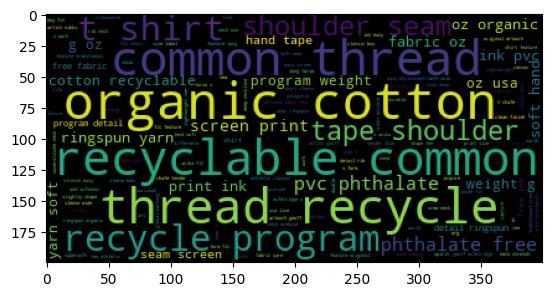

-----------
CLUSTER  2


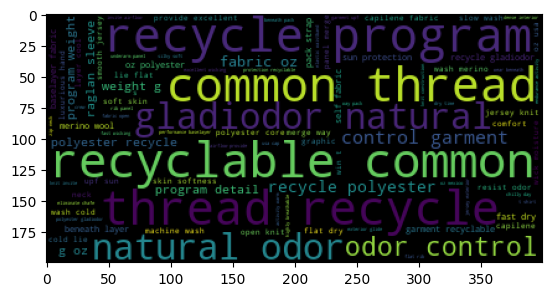

-----------
CLUSTER  7


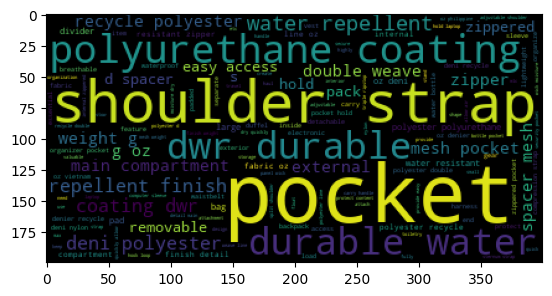

-----------
CLUSTER  5


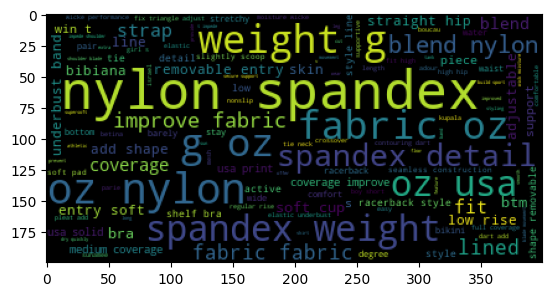

-----------
CLUSTER  9


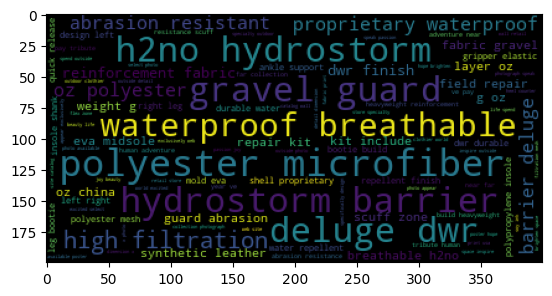

-----------
CLUSTER  8


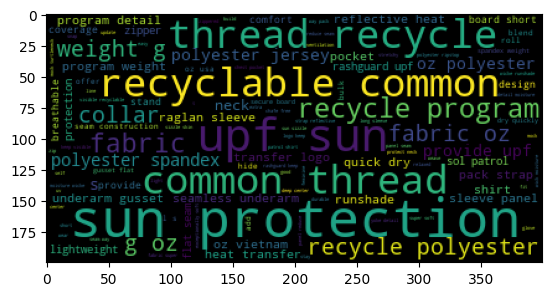

-----------
CLUSTER  3


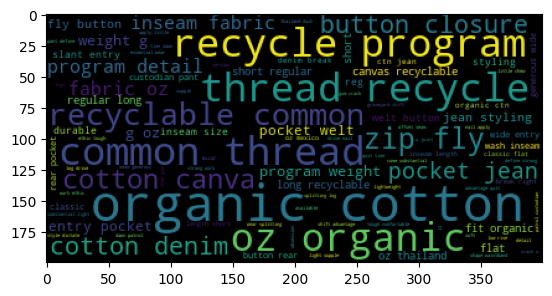

-----------
CLUSTER  4


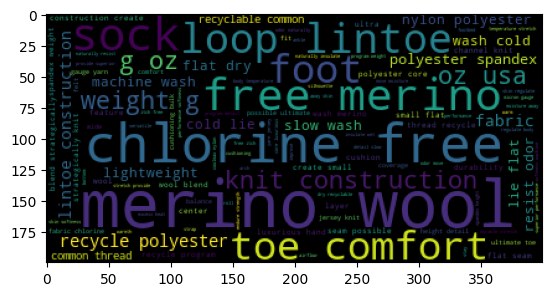

-----------
CLUSTER  6


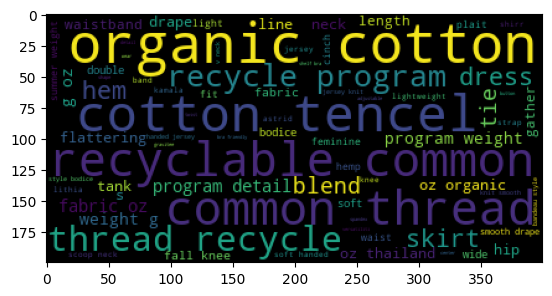

-----------


In [171]:
# visualization of a wordcloud for each class
for c in topic_encoded_df["class_pred"].value_counts().index :
    print("CLUSTER ", c)
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df["class_pred"]==c,"documents"])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    print("-----------")

In [172]:
# Create DataFrame containing the description of each topic in terms of the words in the vocabulary
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ["topic_" + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

topics_description.head()

000        03        10       100      1000      1021      1027  \
topic_0  0.002540  0.000543  0.049019  0.131556  0.000400  0.000318  0.000248   
topic_1  0.000252  0.000743  0.009239  0.053766  0.000489  0.000459  0.000276   
topic_2  0.001212  0.000710  0.046279  0.016830  0.000421  0.000325  0.000134   
topic_3  0.003982  0.001399  0.085361  0.056715  0.001166  0.000673  0.000097   
topic_4  0.002264  0.000344  0.012059  0.062955  0.000381  0.000064  0.000039   

              103      1038      1055  ...      yvon      zest    zinger  \
topic_0  0.012129  0.000423  0.000191  ...  0.001639  0.001138  0.000637   
topic_1  0.023150  0.000591  0.000274  ...  0.004780  0.001406  0.000852   
topic_2  0.000631  0.000542  0.000121  ...  0.000703  0.000266  0.000818   
topic_3  0.005875  0.001255  0.000203  ...  0.003095  0.002590  0.000847   
topic_4  0.003024  0.000242  0.000317  ...  0.000554  0.000681  0.000339   

              zip    zipped    zipper  zippered   zipping      zips      zone  
topic_0  0.084749  0.000894  0.086274  0.067284  0.001780  0.001775  0.007086  
topic_1  0.058853  0.001061  0.102269  0.079123  0.002678  0.002392  0.010957  
topic_2  0.067780  0.000387  0.049354  0.060539  0.001993  0.001911  0.001495  
topic_3  0.073960  0.000983  0.119710  0.062736  0.004930  0.001190  0.017206  
topic_4  0.021782  0.000103  0.013027  0.011275  0.000593  0.000397  0.020104  

[5 rows x 3833 columns]